In [1]:
# Example_1_SIMPLE LINE EXAMPLE ===================================================================================

from bokeh.plotting import figure, output_notebook, show

# Prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# Output to static HTML file
#output_file("simple line example.html")

# Output to notebook
output_notebook()

# Create a new plot with a title and axix labels
p = figure(
    title = "simple line example",
    x_axis_label = 'x', y_axis_label = 'y',
    plot_width = 500, plot_height = 500)

# Add a line renderer with legend and line thickness
p.line(x, y, legend = "Temp.", line_width = 5)

# Title properties
p.title.text = '< simple line example >'
p.title.text_font = "helvetica"
p.title.text_font_size = "16px"
p.title.text_font_style = "bold"
p.title.text_color = "olive"
p.title.vertical_align = 'middle'   # top, middle, bottom
p.title.align = 'center'   # left, right, center

# Show the results
show(p)

Loading BokehJS ...

In [2]:
# Example_2_LOG AXIS EXAMPLE ======================================================================================

from bokeh.plotting import figure, output_notebook, show

# Prepare some data
x = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
y0 = [i**2 for i in x]
y1 = [10**i for i in x]
y2 = [10**(i**2) for i in x]

# Output to static HTML file
#output_file("log_lines.html")

# Output to notebook
output_notebook()

# Create a new plot with a title and axix labels
p = figure(
    tools = "pan, box_zoom, reset, save",
    title = "log axis example",
    x_axis_label = 'sections',
    y_axis_label = 'particles', y_axis_type = "log", y_range = [0.001, 10**11],
    plot_width = 500, plot_height = 500)

# Add some renderers
p.line(x, x, legend = "y=x")
p.circle(x, x, legend = "y=x", fill_color = "white", size = 8)
p.line(x, y0, legend = "y=x^2", line_width = 3)
p.line(x, y1, legend = "y=10^x", line_color = "red")
p.circle(x, y1, legend = "y=10^x", fill_color = "red", line_color = "red", size = 6)
p.line(x, y2, legend = "y=10^x^2", line_color = "orange", line_dash = "4 4")

# Title properties
p.title.text = '< log axis example >'
p.title.text_font = "helvetica"
p.title.text_font_size = "16px"
p.title.text_font_style = "bold"
p.title.text_color = "olive"
p.title.vertical_align = 'middle'   # top, middle, bottom
p.title.align = 'center'   # left, right, center

# Show the results
show(p)

Loading BokehJS ...

In [2]:
# Example_3_COLOR SCATTER ========================================================================================

import numpy as np
from bokeh.plotting import figure, output_notebook, show

# Prepare Datas ----------------------------------------------------------------------------------------------
N = 4000
x = np.random.random(size = N) * 100
y = np.random.random(size = N) * 100
radii = np.random.random(size = N) * 1.5
colors = ["#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50 + 2*x, 30 + 2*y)]

# Output to static HTML file (with CDN resources) ----------------------------------------------------------------
#output_file("color_scatter.html", title = "color_scatter.py example", mode = "cdn")

# Output to notebook ---------------------------------------------------------------------------------------------
output_notebook()

# Create a new plot with a title and axix labels -----------------------------------------------------------------
p = figure(
    tools = "crosshair, pan, wheel_zoom, box_zoom, reset, box_select, lasso_select",
    x_range = (0, 100), y_range = (0, 100),
    plot_width = 800, plot_height = 800)

# Add a circle render with vectorized colors and sizes -----------------------------------------------------------
p.circle(x, y, radius = radii, fill_color = colors, fill_alpha = 0.5, line_color = None)

# Grid properties ------------------------------------------------------------------------------------------------
p.grid.visible = False

# Axes properties ------------------------------------------------------------------------------------------------
p.xaxis.visible = False
p.yaxis.visible = False

# Title properties -----------------------------------------------------------------------------------------------
p.title.text = ' COLOR SCATTER '
p.title.background_fill_color = "#727998"
p.title.text_font = "futura"
p.title.text_font_size = "27px"
p.title.text_font_style = "bold"
p.title.text_color = "white"
p.title.vertical_align = 'middle'   # top, middle, bottom
p.title.align = 'center'   # left, right, center

# Show the results -----------------------------------------------------------------------------------------------
show(p)

4000


Loading BokehJS ...

In [4]:
# Example_4_LINKED PANNING AND BRUSHING ===========================================================================

from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_notebook, show

# Prepare some data
N = 100
x = np.linspace(0, 4*np.pi, N)
y0 = np.sin(x)
y1 = np.cos(x)
y2 = np.sin(x) + np.cos(x)

# Output to static HTML file
#output_file("linked_panning.html")

# Output to notebook
output_notebook()

# Create a new plot 
s1 = figure(width = 250, plot_height = 250, title = None)
s1.circle(x, y0, size = 10, color = "navy", alpha = 0.5)

# NEW : create a new plot and share both ranges
s2 = figure(width = 250, height = 250, x_range = s1.x_range, y_range = s1.y_range, title = None)
s2.triangle(x, y1, size = 10, color = "firebrick", alpha = 0.5)

# NEW : create a new plot and share only one range
s3 = figure(width = 250, height = 250, x_range = s1.x_range, title = None)
s3.square(x, y2, size = 10, color = "olive", alpha = 0.5)

# NEW : put the subplots in a gridplot
p = gridplot([[s1, s2, s3]], toolbar_location = None)

# Show the results
show(p)

Loading BokehJS ...

In [5]:
# Example_5_LINKED PANNING AND BRUSHING ===========================================================================

import numpy as np
from bokeh.plotting import *
from bokeh.models import ColumnDataSource

# Prepare some data
N = 300
x = np.linspace(0, 4*np.pi, N)
y0 = np.sin(x)
y1 = np.cos(x)

# Output to static HTML file
#output_file("linked_brushing.html")

# Output to notebook
output_notebook()


# NEW : create a column data source for the plots to share
source = ColumnDataSource(data = dict(x = x, y0 = y0, y1 = y1))

TOOLS = "pan, wheel_zoom, box_zoom, reset, save, box_select, lasso_select"

# Create a new plot and add a renderer
left = figure(tools = TOOLS, width = 350, height = 350, title = None)
left.circle('x', 'y0', source = source)

# Create another new plot and add a renderer
right = figure(tools = TOOLS, width = 350, height = 350, title = None)
right.circle('x', 'y1', source = source)

# Put the subplots in a gridplot
p = gridplot([[left, right]])

# Show the results
show(p)

Loading BokehJS ...

In [6]:
# Example_6_DATETIME AXES =========================================================================================

import numpy as np
import bokeh.sampledata
from bokeh.plotting import figure, output_notebook, show
from bokeh.sampledata.stocks import AAPL

# Prepare some data
aapl = np.array(AAPL['adj_close'])
aapl_dates = np.array(AAPL['date'], dtype = np.datetime64)

window_size = 30
window = np.ones(window_size)/float(window_size)
aapl_avg = np.convolve(aapl, window, 'same')

# Output to static HTML file
#output_file("stocks.html")

# Output to notebook
output_notebook()

# Create a new plot with a datetime axis type
p = figure(
    x_axis_type = 'datetime',
    x_axis_label = 'Date', y_axis_label = 'Price',
    plot_width = 800, plot_height = 350)

# Add some renderers
p.circle(aapl_dates, aapl, size = 5,
         line_color = 'red', line_alpha = 0.8,
         fill_color = 'darkgrey', fill_alpha = 0.2,
         legend = 'close')
p.line(aapl_dates, aapl_avg, line_width = 1,
       line_color = 'navy', line_alpha = 1,
       legend = 'avg')

# Title properties
p.title.text = '< AAPL One-Month Average >'
p.title.text_font = "helvetica"
p.title.text_font_size = "16px"
p.title.text_font_style = "bold"
p.title.text_color = "olive"
p.title.vertical_align = 'middle'   # top, middle, bottom
p.title.align = 'center'   # left, right, center

p.legend.location = "top_left"    # top,center,bottom _ left, right, center
p.grid.grid_line_alpha = 0
p.ygrid.band_fill_color = 'grey'
p.ygrid.band_fill_alpha = 0.1

# Show the results
show(p)

Loading BokehJS ...

In [5]:
# Example_7_HEX_TILE ==============================================================================================

import numpy as np
from bokeh.plotting import figure, output_notebook, show
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin

# Prepare some data
n = 50000
x = np.random.randn(n)
y = np.random.randn(n)

bins = hexbin(x, y, 0.1)

# Output to static HTML file
#output_file("hex_tile.html")

# Output to notebook
output_notebook()

# Create a new plot with a title and axix labels
p = figure(
    title = "Manual hex bin for 50000 points",
    match_aspect = True,
    tools = "wheel_zoom, pan, reset",
    background_fill_color = '#440154',
    plot_width = 800, plot_height = 800)

# Add some renderers
p.hex_tile(
    q = "q", r = "r", size = 0.1, line_color = None, source = bins * 1,
    fill_color = linear_cmap('counts', 'Viridis256', 0, max(bins.counts)))

# Title properties
p.grid.visible = False

# Show the results
show(p)

Loading BokehJS ...

In [8]:
# Example_8_HEXBIN ================================================================================================

import numpy as np
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool

# Prepare some data
n = 500
x = 2 + 2*np.random.standard_normal(n)
y = 2 + 2*np.random.standard_normal(n)

# Output to static HTML file
#output_file("hexbin.html")

# Output to notebook
output_notebook()

# Create a new plot with a title and axix labels
p = figure(
    title = "Hexbin for 500 points",
    match_aspect = True,
    tools = "wheel_zoom, pan, reset",
    background_fill_color = '#440154',
    plot_width = 800, plot_height = 800)

r, bins = p.hexbin(x, y, size = 0.5, hover_color = "pink", hover_alpha = 0.8)

# Add some renderers
p.circle(x, y, color = "white", size = 2, alpha = 0.5)

p.add_tools(HoverTool(
    tooltips = [("count", "@c"), ("(q, r)", "(@q, @r)")],
    mode = "mouse", point_policy = "follow_mouse", renderers = [r]))

# Title properties
p.grid.visible = False

# Show the results
show(p)

Loading BokehJS ...

In [9]:
# Example_9_IMAGE_RGBA ============================================================================================

from __future__ import division
import numpy as np
from bokeh.plotting import figure, output_notebook, show

# Prepare some data
N = 20
img = np.empty((N, N), dtype = np.uint32)
view = img.view(dtype = np.uint8).reshape((N, N, 4))

for i in range(N):
    for j in range(N):
        view[i, j, 0] = int(i/N*255)
        view[i, j, 1] = 158
        view[i, j, 2] = int(j/N*255)
        view[i, j, 3] = 255
    
# Output to static HTML file
#output_file("image_rgba.html")

# Output to notebook
output_notebook()

# Create a new plot
p = figure(tooltips = [("x", "$x"), ("y", "$y"), ("value", "@image")])

p.x_range.range_padding = p.y_range.range_padding = 0

# Must give a vector of images
p.image_rgba(image = [img], x = 0, y = 0, dw = 10, dh = 10)

# Title properties
p.title.text = '< Image_RGBA >'
p.title.text_font = "helvetica"
p.title.text_font_size = "16px"
p.title.text_font_style = "bold"
p.title.text_color = "olive"
p.title.vertical_align = 'middle'   # top, middle, bottom
p.title.align = 'center'   # left, right, center

# Show the results
show(p)

Loading BokehJS ...

In [10]:
# Example_10_LORENZ =============================================================================================

import numpy as np
from scipy.integrate import odeint
from bokeh.plotting import figure, output_notebook, show

# Prepare some data
sigma = 10
rho = 28
beta = 8.0/3
theta = 3 * np.pi / 4

def lorenz(xyz, t):
    x, y, z = xyz
    x_dot = sigma * (y - x)
    y_dot = x * rho - x * z - y
    z_dot = x * y - beta* z
    
    return [x_dot, y_dot, z_dot]

# Setting Initial & Range
initial = (-10, -7, 35)
t = np.arange(0, 100, 0.006)

solution = odeint(lorenz, initial, t)

x = solution[:, 0]
y = solution[:, 1]
z = solution[:, 2]

xprime = np.cos(theta) * x - np.sin(theta) * y

colors = ["#C6DBEF", "#9ECAE1", "#6BAED6", "#4292C6", "#2171B5", "#08519C", "#08306B",]

# Output to static HTML file
#output_file("image_rgba.html")

# Output to notebook
output_notebook()

# Create a new plot
p = figure(title="Lorenz attractor example", background_fill_color="#fafafa")

# Add a Render
p.multi_line(np.array_split(xprime, 7), np.array_split(z, 7), line_color=colors, line_alpha=0.8, line_width=1.5)

# Show the results
show(p)

Loading BokehJS ...

In [11]:
# Importing Modules and Packages ===================================================================
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (12,8))

#plt.contour(X, Y, Z, colors = 'black')
#plt.contour(X, Y, Z, 20, cmap = "viridis")
plt.contourf(X, Y, Z, 20, cmap = "viridis")
plt.colorbar()

Text(0.5,0.92,'3D Contour Plots')

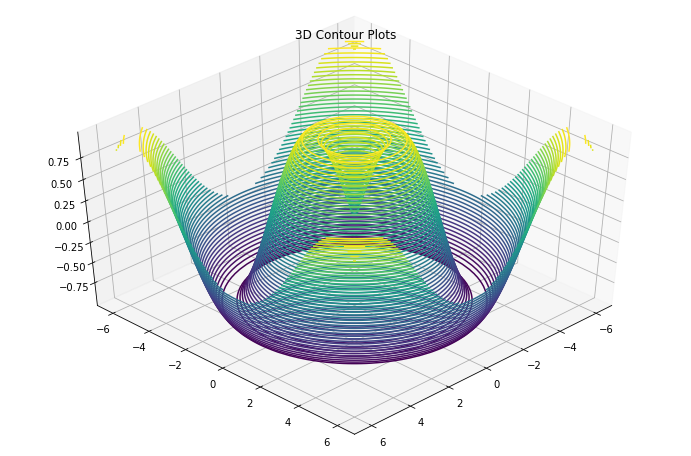

In [12]:
# Importing Modules and Packages ===================================================================
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (12,8))

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap = 'viridis')
ax.view_init(45,45)
ax.set_title('3D Contour Plots')

Text(0.5,0.92,'wire-frame')

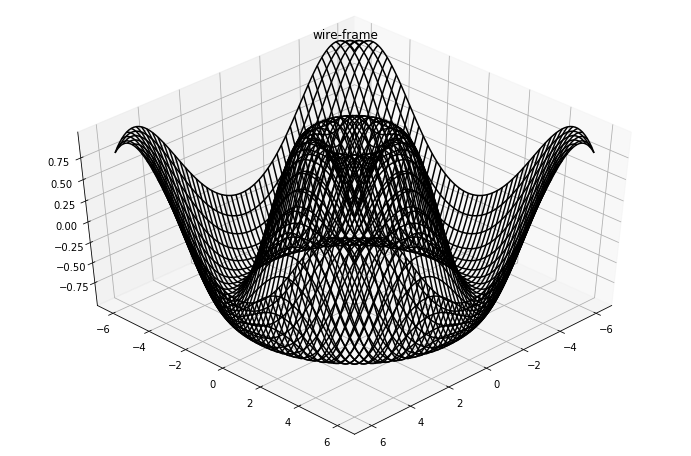

In [13]:
# Importing Modules and Packages ===================================================================
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (12,8))

ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color = 'black')
ax.view_init(45,45)
ax.set_title('wire-frame')

Text(0.5,0.92,'surface')

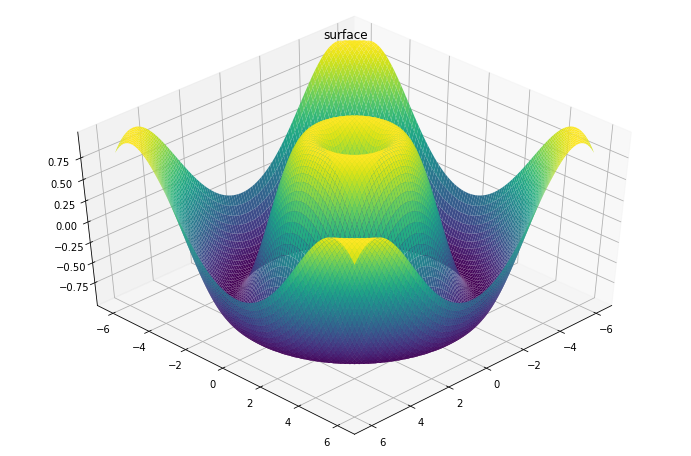

In [14]:
# Importing Modules and Packages ===================================================================
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (12,8))

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
ax.view_init(45,45)
ax.set_title('surface')

Text(0.5,0.92,'surface')

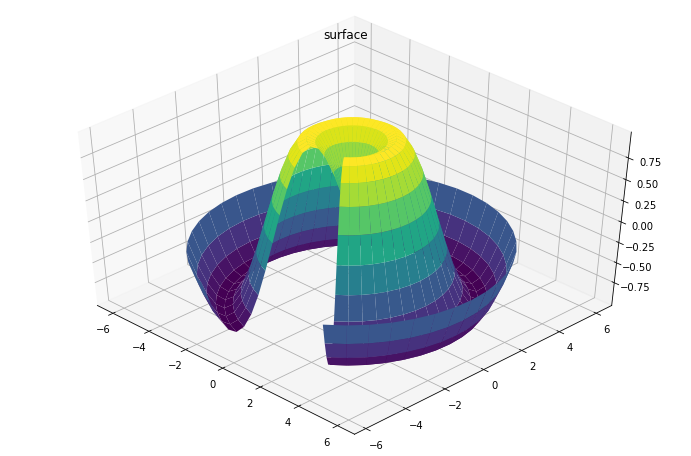

In [15]:
# Importing Modules and Packages ===================================================================
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

fig = plt.figure(figsize = (12,8))

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
ax.view_init(45,-45)
ax.set_title('surface')

Text(0.5,0.92,'surface')

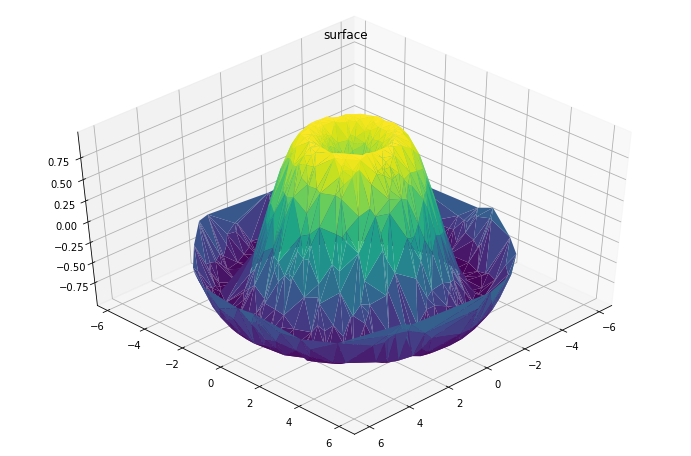

In [16]:
# Importing Modules and Packages ===================================================================
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

fig = plt.figure(figsize = (12,8))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, cmap = 'viridis', edgecolor = 'none')
ax.view_init(45,45)
ax.set_title('surface')